In [28]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [21]:
train_df = pd.read_csv('/content/fashion-mnist_train.csv')
test_df = pd.read_csv('/content/fashion-mnist_test.csv')


### **Each row is a different image representation in the form pixel data.**

In [26]:
train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,5.0,4.0,5.0,5.0,3.0,5.0,...,7.0,8.0,7.0,4.0,3.0,7.0,5.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,203.0,214.0,166.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
test_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103.0,87.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,0,0,0,0,14,53,99,...,0.0,0.0,0.0,0.0,63.0,53.0,31.0,0.0,0.0,0.0
3,2,0,0,0,0,0,0,0,0,0,...,137.0,126.0,140.0,0.0,133.0,224.0,222.0,56.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2,0,0,0,0,0,44,105,44,10,...,105.0,64.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6,0,0,0,0,0,0,0,1,0,...,174.0,136.0,155.0,31.0,0.0,1.0,0.0,0.0,0.0,0.0
8,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0,0,0,0,0,0,0,0,0,...,57.0,70.0,28.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


### **Transforming it to float32 to be acceptable by tensorflow and keras**

In [22]:
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype = 'float32')

In [29]:
mask = np.isnan(train_data).astype(np.uint8)
train_data = cv2.inpaint(train_data.astype(np.float32), mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

mask = np.isnan(test_data).astype(np.uint8)
test_data = cv2.inpaint(test_data.astype(np.float32), mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

In [32]:
np.isnan(train_data).any(), np.isnan(test_data).any()

(False, False)

### **Now slicing the dataframes separating X (image features) and y (image label)**

In [33]:
X_train = train_data[:,1:] # select all lines and all columns excluding the first one
y_train = train_data[:,0] # select only first column and all lines

In [34]:
X_test = test_data[:,1:]
y_test = test_data[:,0]

### **Normalize pixel values to the range [0,1]**

In [35]:
X_train = X_train / 255
X_test = X_test / 255

In [36]:
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.00392157,
        -0.00392157,  0.00337616]], dtype=float32)

In [37]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train,test_size = 0.2,random_state = 42)

### **Sample of images after resize of the data**

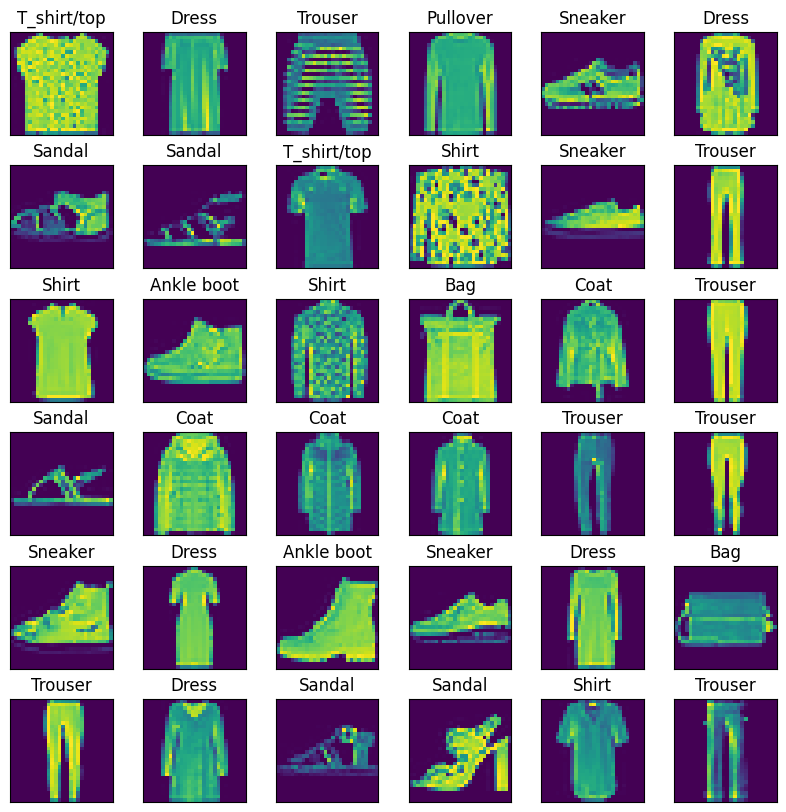

In [38]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1) # to hide the x and y ticks and make the display much cleaner
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28))) # reshaped back into 2d array
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.subplots_adjust(hspace=0.3)
plt.show()

### **Constructing Neural Network Architecture**

In [39]:
# preparing image data
image_cols = 28
image_rows = 28
image_shape = (image_cols, image_rows, 1) # 1 cause it's one channel image since it's grayscale

In [40]:
# we unpack image_shape and append it to X.shape[0] to finalize acceptable input format.
# CNN accpets 2D input and 3D input such as videos or multi-channel images.
X_train = X_train.reshape(X_train.shape[0],*image_shape)
X_test = X_test.reshape(X_test.shape[0],*image_shape)
X_validate = X_validate.reshape(X_validate.shape[0],*image_shape)

In [41]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = image_shape),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173,738 (678.66 KB)

 Trainable params: 173,738 (678.66 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.fit(X_train, y_train,batch_size=4096, epochs = 75,verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9604 - loss: 0.1297 - val_accuracy: 0.8912 - val_loss: 0.3819
Epoch 2/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9596 - loss: 0.1311 - val_accuracy: 0.8923 - val_loss: 0.3797
Epoch 3/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9641 - loss: 0.1231 - val_accuracy: 0.8912 - val_loss: 0.3802
Epoch 4/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9628 - loss: 0.1266 - val_accuracy: 0.8933 - val_loss: 0.3826
Epoch 5/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9601 - loss: 0.1297 - val_accuracy: 0.8891 - val_loss: 0.3835
Epoch 6/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9591 - loss: 0.1283 - val_accuracy: 0.8923 - val_loss: 0.3849
Epoch 7/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9601 - loss: 0.1256 - val_accuracy: 0.8923 - val_loss: 0.3837
Epoch 8/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9649 - loss: 0.1220 - val_accuracy: 0.8881 - val_loss: 0.3819
Epoch 9/75
1/1 ━

In [52]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8697 - loss: 0.4193
Test accuracy: 0.8745762705802917


In [63]:
#Get the predictions for the test data
y_pred =  model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
#Get the indices to be plotted
y_true = test_df.iloc[:, 0]
correct = np.nonzero(y_pred_classes == y_true)[0]
incorrect = np.nonzero(y_pred_classes != y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, y_pred_classes, target_names=target_names))

148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
              precision    recall  f1-score   support

     Class 0       0.79      0.81      0.80       469
     Class 1       0.99      0.97      0.98       459
     Class 2       0.79      0.81      0.80       449
     Class 3       0.88      0.89      0.89       485
     Class 4       0.81      0.84      0.83       474
     Class 5       0.96      0.94      0.95       471
     Class 6       0.70      0.64      0.67       495
     Class 7       0.92      0.94      0.93       447
     Class 8       0.96      0.95      0.96       484
     Class 9       0.93      0.95      0.94       487

    accuracy                           0.87      4720
   macro avg       0.87      0.88      0.87      4720
weighted avg       0.87      0.87      0.87      4720



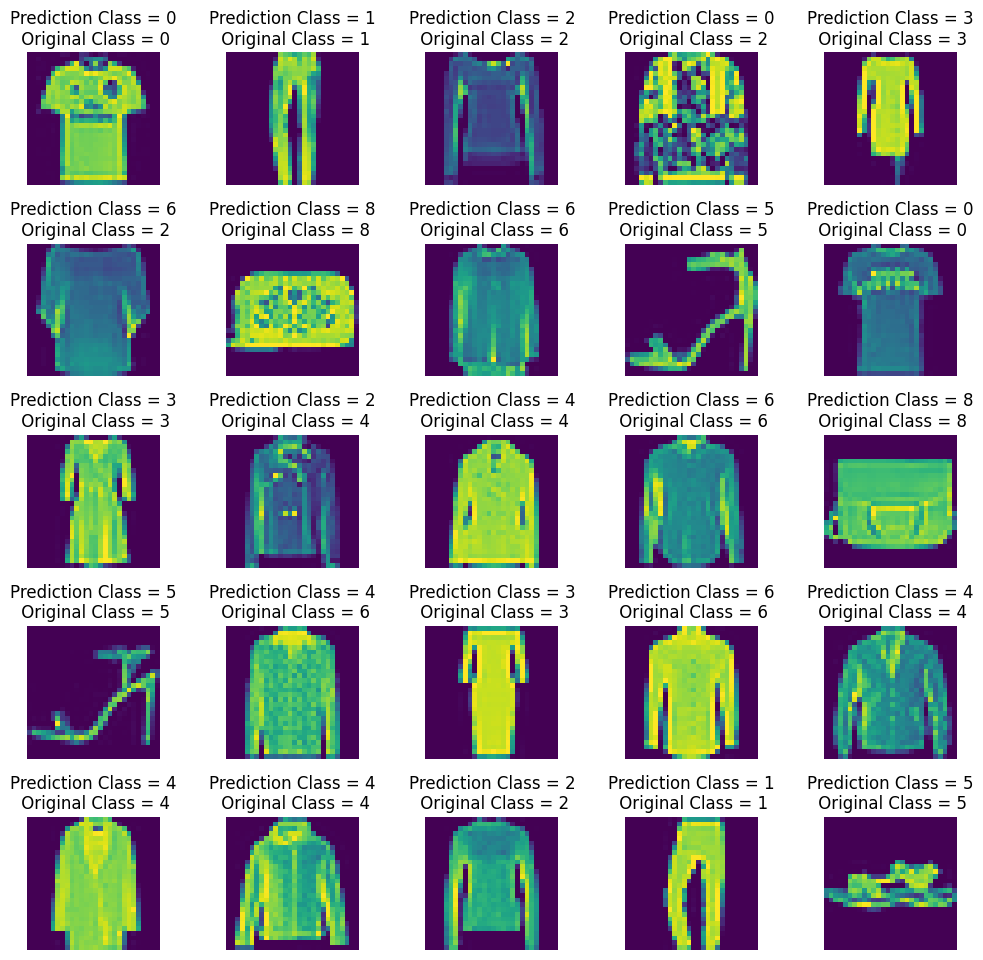

In [70]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {int(y_pred_classes[i])}\n Original Class = {int(y_test[i])}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)